In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [ ]:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

print("Dataset Overview:")
print(df.head())


print("\nDataset Information:")
df.info()

print("\nDataset Description:")
print(df.describe())

Dataset Overview:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2 

In [ ]:
X = df.drop('quality', axis=1)  
y = df['quality']               

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nStandardized Features:")
print(X_scaled[:5])



Standardized Features:
[[-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]
 [-0.29854743  1.96744245 -1.39147228  0.04341614  0.2238752   0.87263823
   0.62436323  0.02826077 -0.7199333   0.1289504  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 -0.16942723  0.09635286 -0.08366945
   0.22904665  0.13426351 -0.33117661 -0.04808883 -0.58477711]
 [ 1.65485608 -1.38444349  1.4841536  -0.45321841 -0.26496041  0.10759209
   0.41150046  0.6642772  -0.97910442 -0.46118037 -0.58477711]
 [-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]]


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['quality'] = y

print("\nExplained Variance Ratio of Components:")
print(pca.explained_variance_ratio_)



Explained Variance Ratio of Components:
[0.28173931 0.1750827 ]


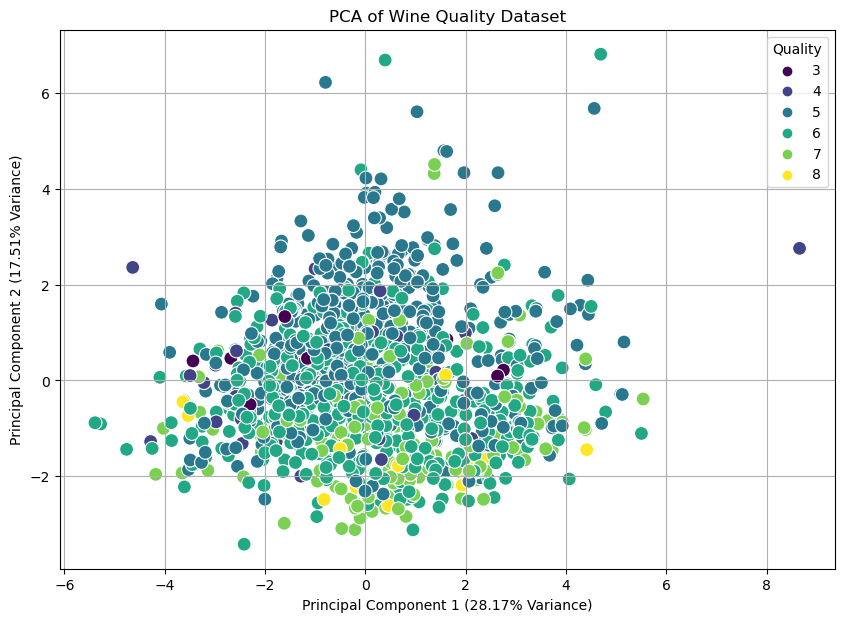

In [5]:
# Plot PCA results with wine quality labels
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='quality', palette='viridis', s=100)
plt.title('PCA of Wine Quality Dataset')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} Variance)')
plt.legend(title='Quality')
plt.grid()
plt.show()


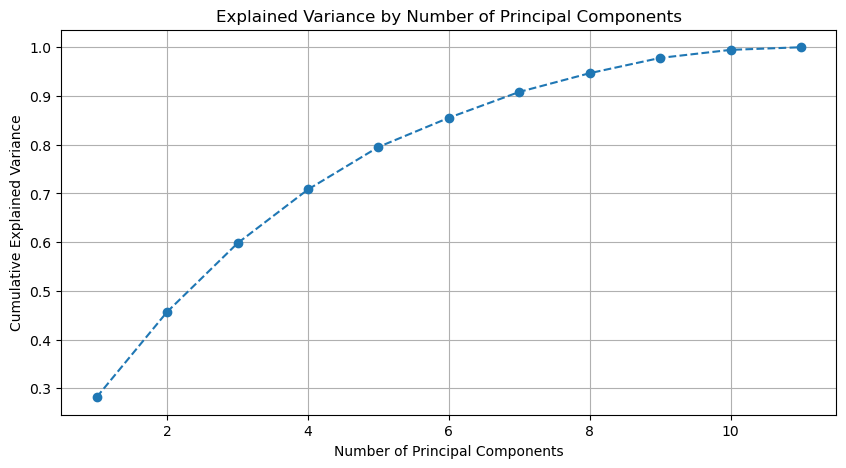

PC1 - Cumulative Explained Variance: 28.17%
PC2 - Cumulative Explained Variance: 45.68%
PC3 - Cumulative Explained Variance: 59.78%
PC4 - Cumulative Explained Variance: 70.81%
PC5 - Cumulative Explained Variance: 79.53%
PC6 - Cumulative Explained Variance: 85.52%
PC7 - Cumulative Explained Variance: 90.83%
PC8 - Cumulative Explained Variance: 94.68%
PC9 - Cumulative Explained Variance: 97.81%
PC10 - Cumulative Explained Variance: 99.46%


In [ ]:
pca_full = PCA().fit(X_scaled)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

for i, ratio in enumerate(explained_variance[:10], start=1):
    print(f"PC{i} - Cumulative Explained Variance: {ratio:.2%}")


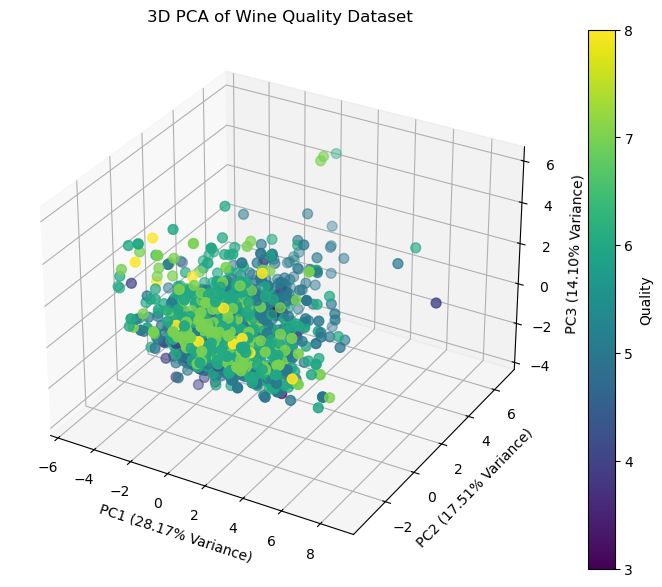

In [ ]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

pca_df_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['quality'] = y

# Plotting in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c=y, cmap='viridis', s=50)

# Labels and title
ax.set_title('3D PCA of Wine Quality Dataset')
ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%} Variance)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%} Variance)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%} Variance)')
plt.colorbar(scatter, ax=ax, label='Quality')
plt.show()
